In [ ]:
x , y = make_classification(n_features =5, n_redundant= 0, n_informative= 5,
                         n_clusters_per_class = 1)

In [ ]:
v = pd.DataFrame(x ,columns = ["col1" , "col2" , "col3" , "col14" , "col15"])
v["target"] = y
print(v.shape)
v.head()

(100, 6)


,col1,col2,col3,col14,col15,target
0,-0.701340,3.263858,2.648061,-0.772736,-1.791822,0
1,-1.298945,-0.362261,-0.362552,-0.702884,-0.736362,1
2,-1.888811,1.939893,1.655486,-1.149161,-1.344245,0
3,-1.118850,-0.671147,0.286460,-1.545356,0.406325,1
4,2.865960,3.243910,0.691116,-2.386450,-2.703132,0


In [ ]:
# function for row sampling
def sample_rows(v , percent):
  return v.sample(int(percent*v.shape[0]), replace = True)

In [ ]:

# function for feature sampling
def sample_features(v,percent):
  cols = random.sample(v.columns.tolist()[:-1],int(percent*(v.shape[1]-1)))
  new_v = v[cols]
  new_v['target'] = v['target']
  return new_v


In [ ]:
import random


**Row sampling**

In [ ]:


# function for combined sampling

def combined_sampling(v,row_percent,col_percent):
  new_v = sample_rows(v,row_percent)
  return sample_features(new_v,col_percent)

In [ ]:

v1 = sample_rows(v , 0.2)

# randomly we have selected only 10 rows out of 1000 rows
# there  is with_replacement  sampling

In [ ]:
v2 = sample_rows(v,0.2)

In [ ]:
v3 = sample_rows(v , 0.2)

In [ ]:
v1.shape

(20, 6)

In [ ]:

print(v1.columns)
print(v2.columns)
print(v3.columns)

Index(['col1', 'col2', 'col3', 'col14', 'col15', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col14', 'col15', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col14', 'col15', 'target'], dtype='object')


In [ ]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [ ]:
# training  our data

clf1.fit(v1.iloc[:,0:5],v1.iloc[:,-1])
clf2.fit(v2.iloc[:,0:5],v2.iloc[:,-1])
clf3.fit(v3.iloc[:,0:5],v3.iloc[:,-1])


DecisionTreeClassifier()

In [ ]:


from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[2] <= 0.108\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[4] <= -0.394\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

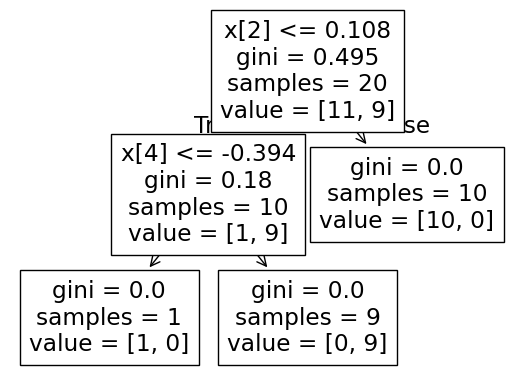

In [ ]:


plot_tree(clf1)

[Text(0.5, 0.8333333333333334, 'x[4] <= 0.116\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.25, 0.5, 'x[2] <= -0.634\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.483\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

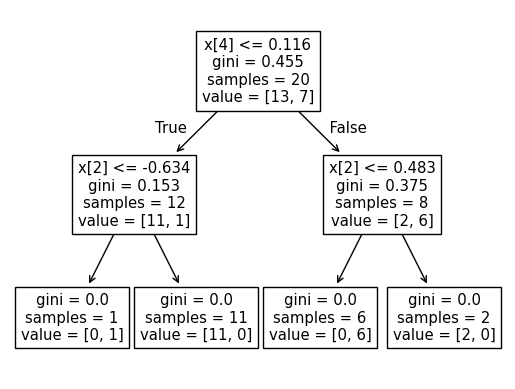

In [ ]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.43\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.4, 0.5, 'x[1] <= 0.163\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7, 0.6666666666666667, '  False')]

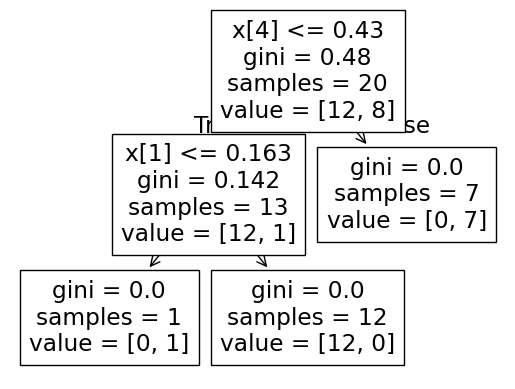

In [ ]:
plot_tree(clf3)

In [ ]:
# HERE clf1 , clf2 , clf3 if all gives sames output then
#  we  will take  that output
# if any two prediction is same then we will goes to
# majority voting

In [ ]:

clf1.predict(np.array([-0.745009 ,
                        2.433556 ,	0.991949 ,	0.569177 ,-0.939764	]).reshape(1,5))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:

clf2.predict(np.array([-0.745009 ,
                        2.433556 ,	0.991949 ,	0.569177 ,-0.939764	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:

clf3.predict(np.array([-0.745009 ,
                        2.433556 ,	0.991949 ,	0.569177 ,-0.939764	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([0.857326 ,	0.491438, -1.130443 , 	-0.347422	, -0.275036]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([2.134156	, 2.390825 , 	-1.291903 , 	0.507090	 , -0.813496	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf2.predict(np.array([2.134156	, 2.390825 , 	-1.291903 , 	0.507090	 , -0.813496	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf3.predict(np.array([2.134156	, 2.390825 , 	-1.291903 , 	0.507090	 , -0.813496	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

**coulmn sampling**

In [ ]:
 v5 = sample_features(v , 0.5)
# rows are here 100 and columns are

/tmp/ipython-input-2188157105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_v['target'] = v['target']


In [ ]:
 v6 = sample_features(v , 0.8)

/tmp/ipython-input-2188157105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_v['target'] = v['target']


In [ ]:
 v6 = sample_features(v , 0.8)

/tmp/ipython-input-2188157105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_v['target'] = v['target']


In [ ]:
 v7 = sample_features(v , 0.8)

/tmp/ipython-input-2188157105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_v['target'] = v['target']
